In [1]:
# Import necessary things
import numpy as np
import matplotlib.pyplot as plt
import pyart
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
filename = '/home/hunzinger/data/ppi_cf/corcsapr2cfrppiM1.a1.20181102.231504.nc'
#radar = pyart.aux_io.read_gamic(filename, file_field_names=True) 
radar = pyart.io.cfradial.read_cfradial(filename)#, file_field_names=True) 

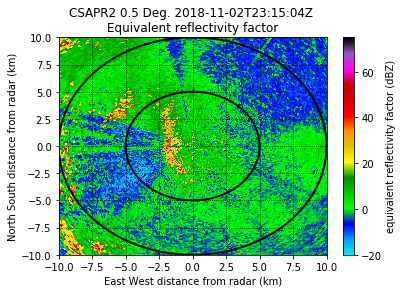

In [3]:
#print(radar.sweep_number)
display = pyart.graph.RadarDisplay(radar)
range_rings = [5,10,15,20,25,30]
fig = plt.figure()
#ax = fig.add_subplot(111)
display.plot_ppi('reflectivity', 0, vmin=-20, vmax=75.,cmap=pyart.graph.cm.NWSRef)
display.set_limits(xlim=(-10,10),ylim=(-10,10))
display.plot_range_rings(range_rings)
display.plot_grid_lines()

In [7]:
#print(radar.fields)

# Constrain range between 1 - 5 km
r_start_idx = np.where(radar.range['data'] < 1000.)[0][-1]+1
r_stop_idx = np.where(radar.range['data'] > 5000.)[0][0]

# Using lowest elevation angle of PPI (0.5 deg)
sweep_start_idx = radar.sweep_start_ray_index['data'][0]
sweep_stop_idx = radar.sweep_end_ray_index['data'][0]+1

print(r_start_idx,r_stop_idx)
print(sweep_start_idx,sweep_stop_idx)

# Get variables (only the rays/gates needed)
zh = radar.fields['reflectivity']['data'][sweep_start_idx:sweep_stop_idx,r_start_idx:r_stop_idx]
zdr = radar.fields['differential_reflectivity']['data'][sweep_start_idx:sweep_stop_idx,r_start_idx:r_stop_idx]
r = radar.range['data'][r_start_idx:r_stop_idx]
phi = radar.azimuth['data'][sweep_start_idx:sweep_stop_idx]
zh.size
print(phi[1],phi[0],phi[-1],phi[-2])
zh.shape

if len(phi) > 360:
    diff = len(phi) - 360
    zh_new = np.delete(zh,-diff,axis=0)
    phi_new = np.delete(phi,-diff)

#print(zh_new.shape)
#idxx = np.argsort(phi_new)
#print(len(idxx))
#zh_sort = zh_new[idxx,:]
#phi_sort = phi_new[idxx]
#phi_sort
#phi_new
#zh_sort.shape

10 51
0 360
173.55103 172.55127 171.60645 170.54077


(6,)
(360, 6)


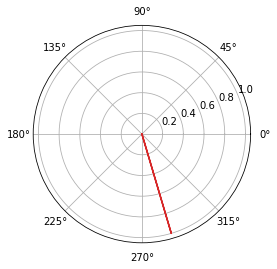

In [8]:
# Step 1
# Develop clutter map
    # Select single precip free day
    # Constrain range within 1-5 km
    # Create a fixed polar grid/array (FPG)
    # Set reflectivity threshold 55 dBZ
    # Flag PPI pixels in FPG box that exceed threshold
r_grid = np.array((0,1,2,3,4,5))*1000.
phi_grid = phi
print(r_grid.shape)
test = np.zeros((phi_grid.shape[0],r_grid.shape[0]))
test[5,3] = 1.
print(test.shape)
plt.polar(test)

In [9]:
r_matrix, theta_matrix = np.meshgrid(r_grid,phi_grid)

In [10]:
#radius_matrix.shape
#theta_matrix.shape
flag = np.zeros((r_matrix.shape))
flag.shape
#flag[0,3] = 3.
#flag[34,:] = 4.
#plt.polar(radius_matrix,theta_matrix)

(360, 6)

/home/hunzinger/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


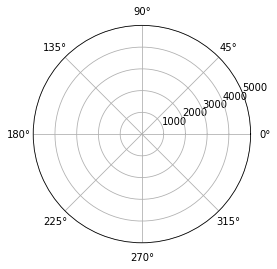

In [11]:
#plt.contourf(flag)

#for i in range(0,360):
#    for j in range(0,10):
#        if i%3 != 0:
#            flag[i,j] = 50

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
ax.contour(theta_matrix, r_matrix, flag)

plt.show()

In [12]:
flag[0,3]

0.0

In [13]:
r_matrix[0,3]

3000.0

In [14]:
theta_matrix[0,3]
len(r_matrix[0,:])-1
len(phi)
len(r)
len(r_matrix[0,:])
print(zh[-1,-1])
print(zh[359,40])
print(theta_matrix[-1,-1])
print(r_matrix[-1,-1])
len(theta_matrix[:,0])
len(r_matrix[0,:])

-9.579078
-9.579078
171.60645
5000.0


6

In [40]:
z_thresh = 55.
# Create an empty array to fill with Z from the clutter area reflectivity grid boxes (CAR)
zh_car = np.empty((zh.shape))
zh_car[:,:] = np.nan

for i in range(0,len(theta_matrix[:,0])):
    for j in range(0,len(r_matrix[0,:])-1):
        if j == 0:
            flag[:,0] = np.nan
        else:
            if np.logical_or(zh[i,j*10-10] >= z_thresh, zh[i,j*10-9] >= z_thresh):
                flag[i,j] = 1
                zh_car[i,j*10-10:j*10-1] = zh[i,j*10-10:j*10-1]
            elif np.logical_or(zh[i,j*10-8] >= z_thresh, zh[i,j*10-7] >= z_thresh):
                flag[i,j] = 1
                zh_car[i,j*10-10:j*10-1] = zh[i,j*10-10:j*10-1]
            elif np.logical_or(zh[i,j*10-6] >= z_thresh, zh[i,j*10-5] >= z_thresh):
                flag[i,j] = 1
                zh_car[i,j*10-10:j*10-1] = zh[i,j*10-10:j*10-1]
            elif np.logical_or(zh[i,j*10-4] >= z_thresh, zh[i,j*10-3] >= z_thresh):
                flag[i,j] = 1
                zh_car[i,j*10-10:j*10-1] = zh[i,j*10-10:j*10-1]
            elif np.logical_or(zh[i,j*10-2] >= z_thresh, zh[i,j*10-1] >= z_thresh):
                flag[i,j] = 1
                zh_car[i,j*10-10:j*10-1] = zh[i,j*10-10:j*10-1]
            #if zh[i,j*10-10] >= z_thresh or zh[i,j*10-9] >= z_thresh or zh[i,j*10-8] >= z_thresh:
                #flag[i,j] = 1
            #elif zh[i,j*10-7] >= z_thresh or zh[i,j*10-6] >= z_thresh or zh[i,j*10-5] >= z_thresh:
             #   flag[i,j] = 1
            #elif zh[i,j*10-4] >= z_thresh or zh[i,j*10-3] >= z_thresh or zh[i,j*10-2] >= z_thresh:
            #    flag[i,j] = 1
            #elif zh[i,j*10-1] >= z_thresh:
            #    flag[i,j] = 1
            else:
                flag[i,j] = 0
#for i in range(0,len(phi)):
    #for j in range(0,len(r)):
 #   for k in range(0,len(r_matrix[0,:]-1)):
            #for m in range(0,len(km_start_idx)):
  #      if k == 0:
   #         flag[:,k] = np.nan # 0-1 km as nan
            #if j%10 == 0.:
    #    else:
     #       print(i,k)
      #      if zh[i,(k*10-10)] >= z_thresh or zh[i,k*10-9] >= z_thresh or zh[i,k*10-8] >= z_thresh:
          #      flag[i,k] = 1
       #     elif zh[i,k*10-7] >= z_thresh or zh[i,k*10-6] >= z_thresh or zh[i,k*10-5] >= z_thresh:
        #        flag[i,k] = 1
         #   elif zh[i,k*10-4] >= z_thresh or zh[i,k*10-3] >= z_thresh or zh[i,k*10-2] >= z_thresh:
          #      flag[i,k] = 1
           # elif zh[i,k*10-1] >= z_thresh or zh[i,k*10] >= z_thresh:
            #    flag[i,k] = 1
            #else:
            #    flag[i,k] = 0
flag
print(zh_car.shape)
zh_car[47,12]

(360, 41)


37.50497817993164

In [29]:
np.where(flag==1)

(array([ 47,  67,  72,  98, 140]), array([2, 2, 2, 2, 2]))

In [30]:
np.where(zh >= 55)

(array([ 47,  67,  72,  98, 140]), array([13, 10, 10, 12, 11]))

In [31]:
flag[47,2]

1.0

In [38]:
zh[47,10]

26.141619

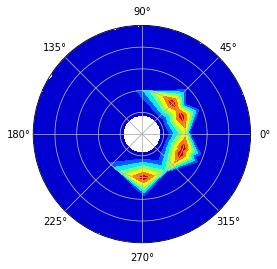

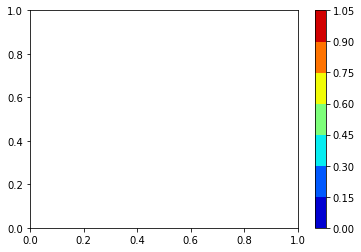

In [21]:
#fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
#fig, ax = plt.subplots()#subplot_kw=dict(projection='polar'))
#ax.contourf(theta_matrix, r_matrix, flag)
#xx = ax.scatter(flag)
#plt.colorbar(xx)
#plt.show()

import matplotlib.cm as cm
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(theta_matrix, r_matrix, flag, cmap=cm.jet)
#plt.plot(flag)
plt.show()
plt.colorbar(ctf)

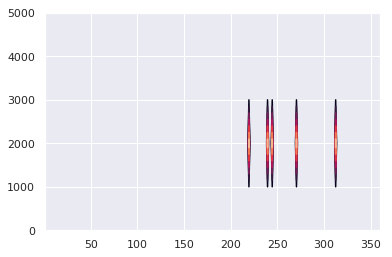

In [22]:
import seaborn as sns
sns.set()
plt.contour(theta_matrix, r_matrix, flag)

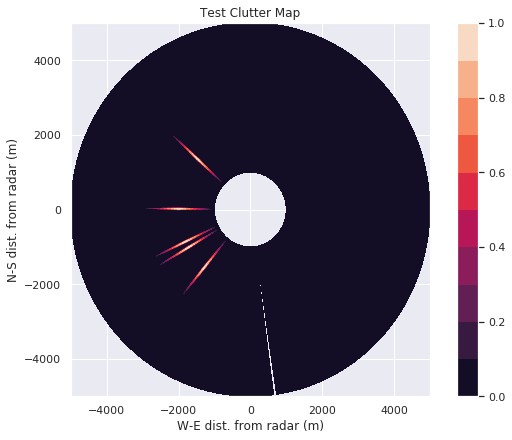

In [23]:
# Convert to cartesian coords to plot
x = r_matrix*np.sin(theta_matrix*np.pi/180.)
y = r_matrix*np.cos(theta_matrix*np.pi/180.)
levels = np.arange(11)/10
fig,ax1 = plt.subplots(figsize=[7,6],constrained_layout=True)
cluttermap = ax1.contourf(x,y,flag,levels)
ax1.set_title('Test Clutter Map')
ax1.set_xlabel('W-E dist. from radar (m)')
ax1.set_ylabel('N-S dist. from radar (m)')
cbar = fig.colorbar(cluttermap)
cbar.ax.set_ylabel('')
plt.show()